### 1. Load Dataset


In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('/home/santanu/code/sjchem/bank-account-fraud-detection/raw_data/Base.csv')


In [4]:
df.head

<bound method NDFrame.head of         fraud_bool  income  name_email_similarity  prev_address_months_count  \
0                0     0.3               0.986506                         -1   
1                0     0.8               0.617426                         -1   
2                0     0.8               0.996707                          9   
3                0     0.6               0.475100                         11   
4                0     0.9               0.842307                         -1   
...            ...     ...                    ...                        ...   
999995           0     0.8               0.124690                         -1   
999996           0     0.9               0.824544                         -1   
999997           0     0.8               0.140891                         -1   
999998           0     0.9               0.002480                         52   
999999           0     0.6               0.993391                         -1   

        c

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

The dataset has no missing value. There are few object column, these needs tobe change numaric. Also need to check the column value before transform them. It will help what kind of information is there.

In [6]:
for column in df.select_dtypes(include=['object']).columns:
    print(f"Column: {column}")
    print(df[column].value_counts())
    print("\n")

Column: payment_type
payment_type
AB    370554
AA    258249
AC    252071
AD    118837
AE       289
Name: count, dtype: int64


Column: employment_status
employment_status
CA    730252
CB    138288
CF     44034
CC     37758
CD     26522
CE     22693
CG       453
Name: count, dtype: int64


Column: housing_status
housing_status
BC    372143
BB    260965
BA    169675
BE    169135
BD     26161
BF      1669
BG       252
Name: count, dtype: int64


Column: source
source
INTERNET    992952
TELEAPP       7048
Name: count, dtype: int64


Column: device_os
device_os
other        342728
linux        332712
windows      263506
macintosh     53826
x11            7228
Name: count, dtype: int64




In [7]:
# transform object to integer
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].astype('category').cat.codes

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  int8   
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [9]:
df.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

### EDA & Fraud Intuition Checks

#### 1. Fraud rate

In [10]:
# Fraud rate
df['fraud_bool'].value_counts(normalize=True)

fraud_bool
0    0.988971
1    0.011029
Name: proportion, dtype: float64

The data is highly imbalance, and it supposed to be so, ~1.1 % quite enough in total data set. Need to check all distribution in data set

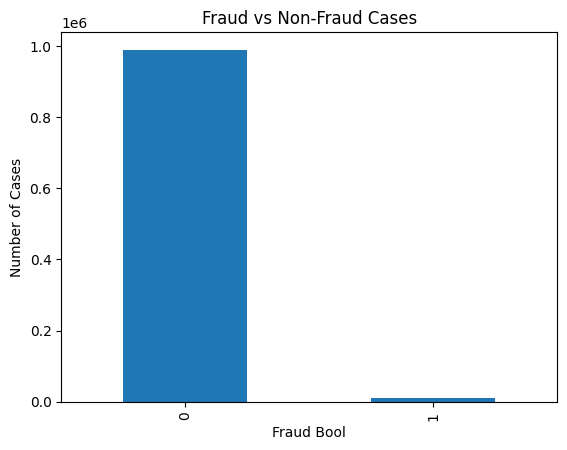

In [11]:
# Fraud rate
df['fraud_bool'].value_counts().plot(kind='bar')
plt.title('Fraud vs Non-Fraud Cases')
plt.xlabel('Fraud Bool')
plt.ylabel('Number of Cases')
plt.show()

#### 2. Univariate Checks (Fraud vs Non-Fraud)

In [12]:
# Income distribution by fraud status
df.groupby('fraud_bool')['income'].describe()

,count,mean,std,min,25%,50%,75%,max
fraud_bool,,,,,,,,
0,988971.0,0.561313,0.290309,0.1,0.3,0.6,0.8,0.9
1,11029.0,0.686635,0.265579,0.1,0.6,0.8,0.9,0.9


From here the Legitimate accounts - mean income ia 0.56 while fradulent acoounts mean income is 0.69 whic is ~22% higher than. It males sense as they are likely inflating this to to get higer credit limit.

In [13]:
#age distribution by fraud status
df.groupby('fraud_bool')['customer_age'].describe()

,count,mean,std,min,25%,50%,75%,max
fraud_bool,,,,,,,,
0,988971.0,33.609125,11.989302,10.0,20.0,30.0,40.0,90.0
1,11029.0,40.858645,13.086334,10.0,30.0,40.0,50.0,90.0


Fradulant mean age 40, it supposed to be, as they looks financially mature: stable income, credit eligibility.

/tmp/ipykernel_2473/94669652.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_fraud = df.groupby('age_bucket')['fraud_bool'].mean()


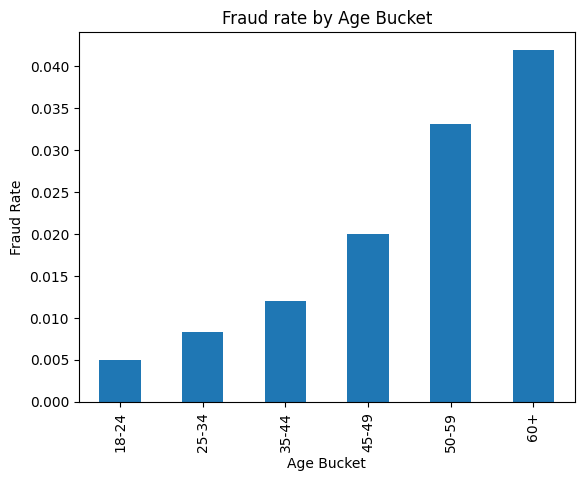

In [14]:
#Plot Fraud Rate by Age Bucket
df ['age_bucket'] = pd.cut(
    df['customer_age'], bins=[18, 25, 35, 45, 50, 60, 100],
    labels=['18-24', '25-34', '35-44', '45-49', '50-59', '60+']
)
age_fraud = df.groupby('age_bucket')['fraud_bool'].mean()
age_fraud.plot(kind='bar')
plt.title('Fraud rate by Age Bucket')
plt.xlabel('Age Bucket')
plt.ylabel('Fraud Rate')
plt.show()

In [15]:
# Credit Risk Score distribution by fraud status
df.groupby('fraud_bool')['credit_risk_score'].describe()

,count,mean,std,min,25%,50%,75%,max
fraud_bool,,,,,,,,
0,988971.0,130.469904,69.357052,-170.0,83.0,122.0,177.0,389.0
1,11029.0,177.590353,81.910348,-97.0,112.0,178.0,240.0,378.0


In [16]:
df[df['customer_age'] > 35].groupby('fraud_bool')['credit_risk_score'].mean()

fraud_bool
0    142.550000
1    188.120793
Name: credit_risk_score, dtype: float64

Fraudsters often - Older age, Lower Credit score, high credit request
#### So Age alone is NOT a fraud feature
Older ≠ fraud
Younger ≠ safe
But: Age × (credit, device, velocity) = *powerful signal*

#### may be Tree models will works.

In [17]:
df.groupby('fraud_bool')['proposed_credit_limit'].median()
# df.groupby('fraud_bool')['proposed_credit_limit'].describe()

fraud_bool
0    200.0
1    500.0
Name: proposed_credit_limit, dtype: float64

#### 3. Binary Feature Sanity checks

In [18]:
# Free eamils
df.groupby('email_is_free')['fraud_bool'].mean()

email_is_free
0    0.007951
1    0.013760
Name: fraud_bool, dtype: float64

In [19]:
# Foreign requests
df.groupby('foreign_request')['fraud_bool'].mean()


foreign_request
0    0.010745
1    0.021987
Name: fraud_bool, dtype: float64

In [20]:
# Phone Validity
df.groupby('phone_mobile_valid')['fraud_bool'].mean()

phone_mobile_valid
0    0.014938
1    0.010544
Name: fraud_bool, dtype: float64

From all three features suggest 1. Free email -> higher fraud rate, 
2. Foreign request =1 -> almost double in the case of fraud and 
3.phone valid case invalid phone -> higher fraud rate.

#### 4. Velocity Feature
which is one of the most important feature in fraude detection

In [21]:
# Velocity 6h / 24h / 4w
for col in ['velocity_6h', 'velocity_24h', 'velocity_4w']:
    print (col, df.groupby('fraud_bool')[col].mean())

velocity_6h fraud_bool
0    5670.664988
1    5183.913444
Name: velocity_6h, dtype: float64
velocity_24h fraud_bool
0    4771.528849
1    4613.138798
Name: velocity_24h, dtype: float64
velocity_4w fraud_bool
0    4857.444566
1    4755.844185
Name: velocity_4w, dtype: float64


Fraudulent accounts show slightly lower velocity values across all timeframes
Non-fraud: 5670 (6h), 4771 (24h), 4857 (4w)
Fraud: 5183 (6h), 4613 (24h), 4755 (4w)
This suggests fraudsters may be more cautious about transaction frequency to avoid detection
However, the differences are relatively small, indicating velocity alone isn't a strong discriminator

In [22]:
df.groupby('fraud_bool')['days_since_request'].describe()


,count,mean,std,min,25%,50%,75%,max
fraud_bool,,,,,,,,
0,988971.0,1.025383,5.378088,4.036860e-09,0.007209,0.015203,0.026361,78.456904
1,11029.0,1.054615,5.707977,1.013114e-06,0.005911,0.013094,0.023265,75.495921


#### 5. Device based check

In [23]:
df.groupby('fraud_bool')['device_distinct_emails_8w'].describe()

,count,mean,std,min,25%,50%,75%,max
fraud_bool,,,,,,,,
0,988971.0,1.017630,0.178471,-1.0,1.0,1.0,1.0,2.0
1,11029.0,1.079427,0.320447,-1.0,1.0,1.0,1.0,2.0


Non-fraud mean: 1.02 emails per device
Fraud mean: 1.08 emails per device
Fraudulent accounts show slightly higher email diversity from the same device, suggesting device sharing or email rotation tactics

In [24]:
df.groupby('device_fraud_count')['fraud_bool'].mean()


device_fraud_count
0    0.011029
Name: fraud_bool, dtype: float64

It almost same for all, does not effects both.

#### 6. Address Stability

In [25]:
df.groupby('fraud_bool')[[
    'current_address_months_count',
    'prev_address_months_count',
]].mean()

,current_address_months_count,prev_address_months_count
fraud_bool,,
0,86.273232,16.839647
1,114.801161,5.861365


##### how long customers have been at their current and previous addresses, which is a strong fraud indicator

current_address_months_count: Months at current address

Non-fraud: 86.3 months (~7.2 years)
Fraud: 114.8 months (~9.6 years)
prev_address_months_count: Months at previous address

Non-fraud: 16.8 months (~1.4 years)
Fraud: 5.9 months (~0.5 years)

Fraudulent applications show a contradictory pattern:

They claim to have lived at their current address 33% longer than legitimate users

But spent 65% less time at their previous address
This suggests fraudsters may be fabricating current address stability while having minimal verifiable address history

The short previous address tenure could indicate:
Fake/stolen identities with inconsistent address records
Frequent address changes to avoid detection
Recent creation of synthetic identities

#### 7. Categorical Risk Ranking 

In [26]:
df.groupby('employment_status')['fraud_bool'].mean().sort_values(ascending=False)

employment_status
2    0.024684
6    0.015453
0    0.012186
1    0.006891
3    0.003770
4    0.002336
5    0.001930
Name: fraud_bool, dtype: float64

In [27]:
df.groupby('housing_status')['fraud_bool'].mean().sort_values(ascending=False)

housing_status
0    0.037466
3    0.008639
2    0.006148
1    0.006008
5    0.004194
6    0.003968
4    0.003441
Name: fraud_bool, dtype: float64

In [28]:
df.groupby('payment_type')['fraud_bool'].mean().sort_values(ascending=False)

payment_type
2    0.016698
1    0.011251
3    0.010822
0    0.005282
4    0.003460
Name: fraud_bool, dtype: float64

In [29]:
df.groupby('source')['fraud_bool'].mean().sort_values(ascending=False)

source
1    0.015891
0    0.010994
Name: fraud_bool, dtype: float64

In [30]:
df.groupby('device_os')['fraud_bool'].mean().sort_values(ascending=False)

device_os
3    0.024694
1    0.013971
4    0.011206
2    0.005760
0    0.005155
Name: fraud_bool, dtype: float64

#### Remarks
This section ranks categorical variables by their fraud rates to understand which categories carry the highest risk:

Employment Status (ranked by fraud rate):
Type 2: 2.47% fraud rate (highest risk)
Type 6: 1.55%
Type 0: 1.22%
Type 1: 0.69%
Type 3: 0.38%
Type 4: 0.23%
Type 5: 0.19% (lowest risk)

Housing Status (ranked by fraud rate):
Type 0: 3.75% fraud rate (highest risk)
Type 3: 0.86%
Type 2: 0.61%
Type 1: 0.60%
Type 5: 0.42%
Type 6: 0.40%
Type 4: 0.34% (lowest risk)

Payment Type (ranked by fraud rate):
Type 2: 1.67% fraud rate (highest risk)
Type 1: 1.13%
Type 3: 1.08%
Type 0: 0.53%
Type 4: 0.35% (lowest risk)

Source (application source):
Type 1 (TELEAPP): 1.59% fraud rate
Type 0 (INTERNET): 1.10% fraud rate

These categorical risk rankings can be used for feature engineering by creating risk scores or using label encoding based on fraud rates. Certain employment statuses, housing situations, and payment types are significantly more associated with fraud and should be weighted accordingly in the model.

In [31]:
# Create a list of numeric features in the DataFrame df
numeric_features = [x for x in df.columns if df[x].nunique() >= 10 and x != 'fraud_bool']

print(numeric_features)

['name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'proposed_credit_limit', 'session_length_in_minutes']


/tmp/ipykernel_2473/1457139611.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Not Fraud', 'Fraud'])
/tmp/ipykernel_2473/1457139611.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Not Fraud', 'Fraud'])
/tmp/ipykernel_2473/1457139611.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Not Fraud', 'Fraud'])
/tmp/ipykernel_2473/1457139611.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Not Fraud', 'Fraud'])
/tmp/ipykernel_2473/1457139611.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a Fixe

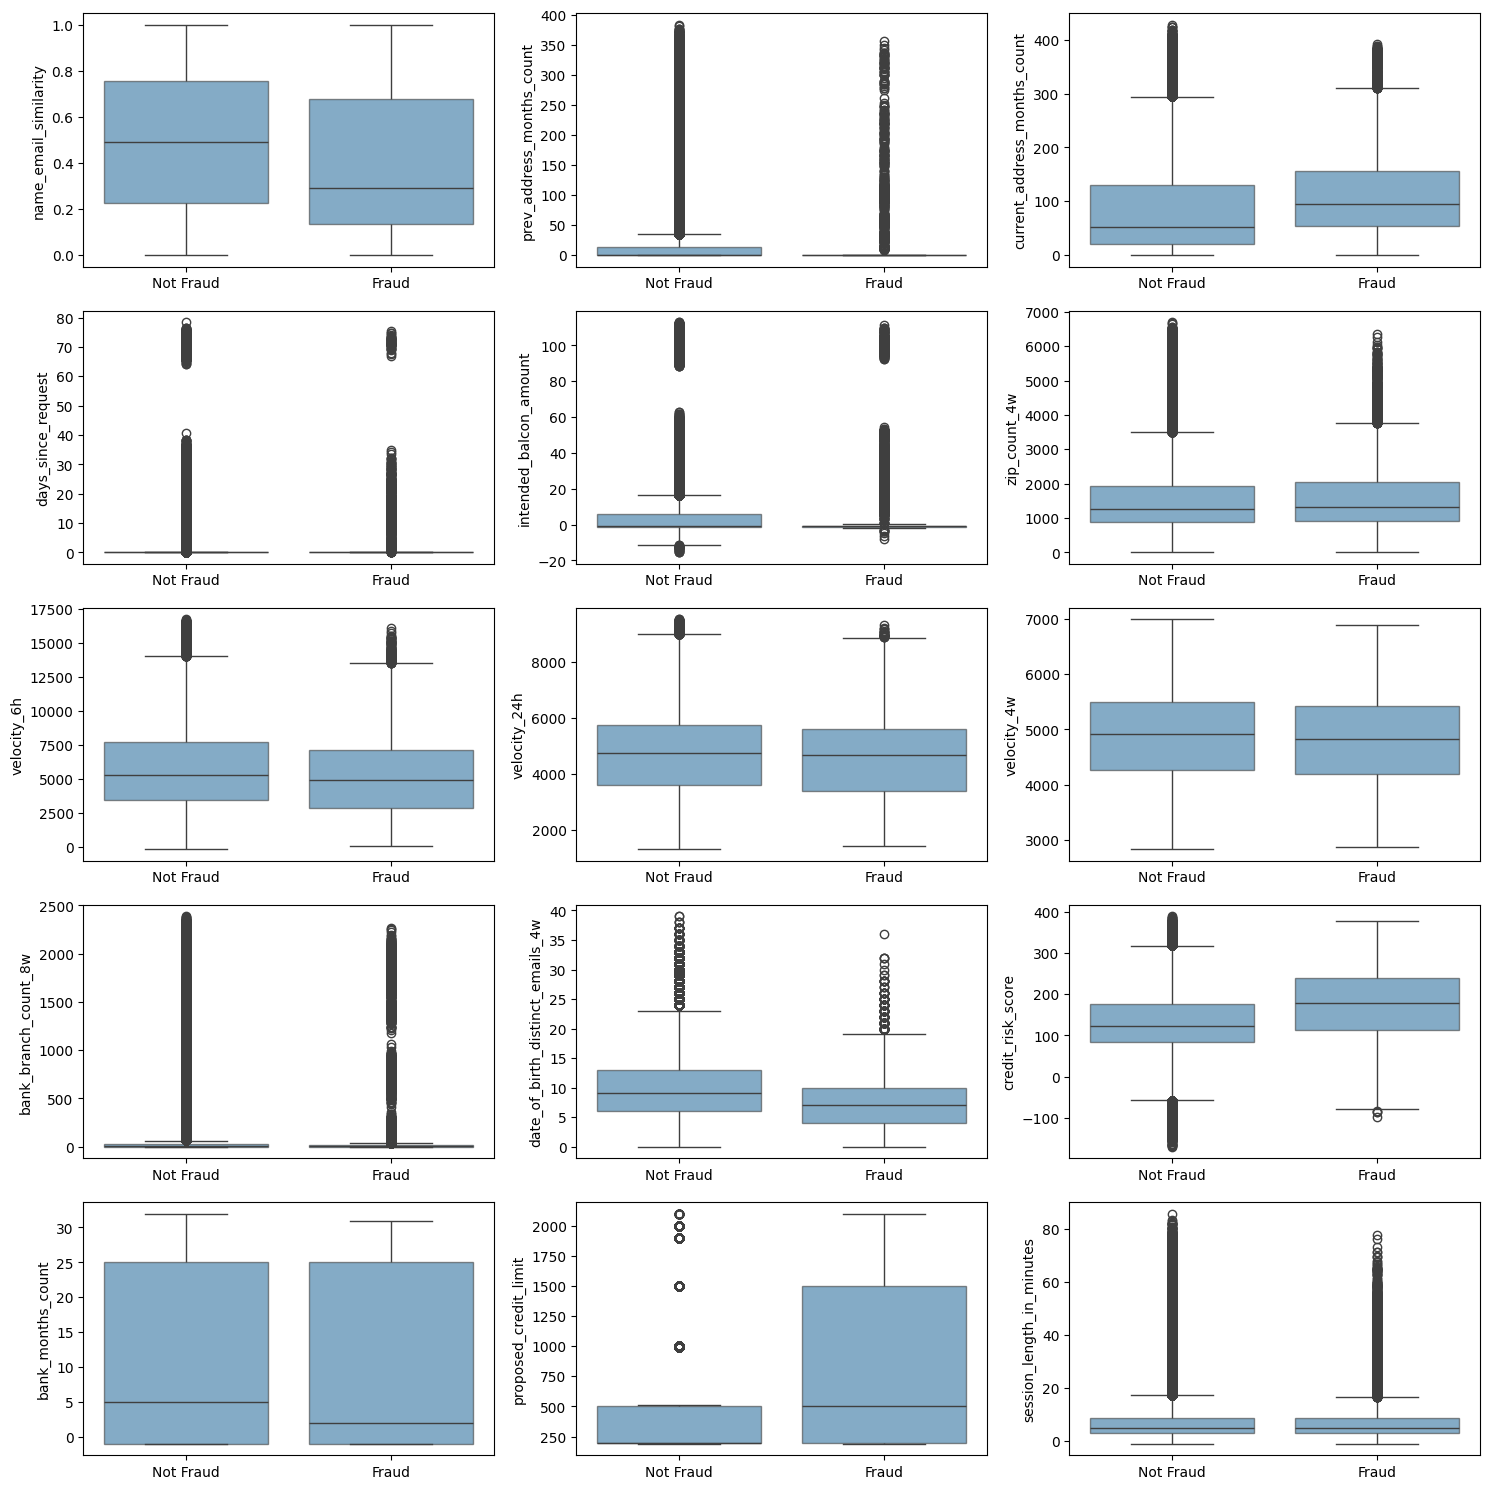

<Figure size 640x480 with 0 Axes>

In [32]:
# Create a grid of subplots
n_features = len(numeric_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols  # Calculate required rows
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 3))


# Loop through the numeric features and plot a box plot for each feature
for i, feature in enumerate(numeric_features):
    ax = axes.flatten()[i]
    sns.boxplot(data=df, x='fraud_bool', y=feature, ax=ax, boxprops=dict(alpha=.6))
    ax.set_xlabel('')
    ax.set_ylabel(feature)
    ax.set_xticklabels(['Not Fraud', 'Fraud'])

# Hide any unused subplots
for i in range(len(numeric_features), n_rows * n_cols):
    axes.flatten()[i].set_visible(False)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()
# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

Removing outliers in the context of imbalanced data can pose challenges. Outliers may contain valuable information or represent rare instances of the minority class. Their removal can lead to information loss, distort the class distribution, introduce bias towards the majority class, and deviate from real-world scenarios.

Considering the potential impact on model performance, it is important to exercise caution and explore alternative approaches that preserve the integrity of the imbalanced data while addressing outliers, such as robust modeling techniques or outlier detection methods specifically designed for imbalanced datasets.

### Final check

In [34]:
# Check 1: High Credit + Risky Score
df.groupby(df['proposed_credit_limit'] > 400)['fraud_bool'].mean()

proposed_credit_limit
False    0.007201
True     0.017134
Name: fraud_bool, dtype: float64

In [35]:
# Check 2: Older Age + Short Bank History
df.groupby((df['customer_age'] > 40) & (df['bank_months_count'] < 12))['fraud_bool'].mean()

False    0.009434
True     0.024455
Name: fraud_bool, dtype: float64

In [36]:
# Check 3: Stable Address + Risky Device
df.groupby(
    (df['current_address_months_count'] > 60) &
    (df['device_distinct_emails_8w'] > 1)
)['fraud_bool'].mean()

False    0.010457
True     0.055670
Name: fraud_bool, dtype: float64

So it looks fraud rate jumps sharply - in this three special case. Now go to next step for Feature engineering process
